# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Incorporated openweathermap to ease data retrieval
import openweathermapy.core as owm

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Establish base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Create dataframe to be added to in for loop
weatherDF = pd.DataFrame()
weatherDF["City"] = ""
weatherDF["Cloudiness"] = ""
weatherDF["Country"] = ""
weatherDF["Date"] = "" 
weatherDF["Humidity"] = ""
weatherDF["Lat"] = ""
weatherDF["Lng"] = ""
weatherDF["Max Temp"] = ""
weatherDF["Wind Speed"] = ""

# Print out the beginning of the retrieval notificaiton
print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through all of the cities within the cities array
for x in np.arange(len(cities)):

    # Print processing of the current record along with city
    print(f"Processing record {x} | {cities[x]}")
    
    # Try these things
    try:
        
        # Request the current wheather statistics from built URL of the current city in JSON form
        currentWeather = requests.get(f"{base_url}{api_key}&q={cities[x]}&units=imperial").json()
        
        # Place all of the variables into the created dataframe
        weatherDF.loc[x, "City"] = currentWeather["name"]
        weatherDF.loc[x, "Cloudiness"] = currentWeather["clouds"]["all"]            
        weatherDF.loc[x, "Country"] = currentWeather["sys"]["country"]
        weatherDF.loc[x, "Date"] = currentWeather["dt"]
        weatherDF.loc[x, "Humidity"] = currentWeather["main"]["humidity"]
        weatherDF.loc[x, "Lat"] = currentWeather["coord"]["lat"]
        weatherDF.loc[x, "Lng"] = currentWeather["coord"]["lon"]
        weatherDF.loc[x, "Max Temp"] = currentWeather["main"]["temp_max"]
        weatherDF.loc[x, "Wind Speed"] = currentWeather["wind"]["speed"]
    
    # If previous block did not work display error message
    except (KeyError, IndexError):
        print("City not found. Skipping...")

# Print end of data retrieval process message
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

# Drop the rows that have been added with no data or partial data
cleanWeather = weatherDF.dropna()

Beginning Data Retrieval
-------------------------------
Processing record 0 | vaini
Processing record 1 | tempio pausania
Processing record 2 | port macquarie
Processing record 3 | blairmore
Processing record 4 | barao de melgaco
Processing record 5 | givors
Processing record 6 | knysna
Processing record 7 | sur
Processing record 8 | amzya
Processing record 9 | upernavik
Processing record 10 | mastic beach
Processing record 11 | leshukonskoye
Processing record 12 | kruisfontein
Processing record 13 | ushuaia
Processing record 14 | dingle
Processing record 15 | kodinsk
Processing record 16 | mikhaylov
Processing record 17 | airai
Processing record 18 | grand gaube
Processing record 19 | ilulissat
Processing record 20 | tessalit
Processing record 21 | puerto ayora
Processing record 22 | busselton
Processing record 23 | hermanus
Processing record 24 | baruun-urt
Processing record 25 | mysliborz
Processing record 26 | taolanaro
City not found. Skipping...
Processing record 27 | punta aren

City not found. Skipping...
Processing record 230 | bone
Processing record 231 | umzimvubu
City not found. Skipping...
Processing record 232 | mitu
Processing record 233 | portland
Processing record 234 | ngukurr
City not found. Skipping...
Processing record 235 | brae
Processing record 236 | opuwo
Processing record 237 | oranjemund
Processing record 238 | ixtapa
Processing record 239 | jiblah
Processing record 240 | lolua
City not found. Skipping...
Processing record 241 | mersing
Processing record 242 | ahuimanu
Processing record 243 | ancud
Processing record 244 | dunedin
Processing record 245 | gao
Processing record 246 | cheuskiny
City not found. Skipping...
Processing record 247 | flinders
Processing record 248 | kodiak
Processing record 249 | severo-kurilsk
Processing record 250 | afmadu
City not found. Skipping...
Processing record 251 | kabare
Processing record 252 | levelland
Processing record 253 | alugan
Processing record 254 | tezu
Processing record 255 | yahotyn
Processin

Processing record 454 | maumere
Processing record 455 | cheney
Processing record 456 | mexico
Processing record 457 | mailani
Processing record 458 | pokhara
Processing record 459 | port hawkesbury
Processing record 460 | rawson
Processing record 461 | sofiysk
City not found. Skipping...
Processing record 462 | camacupa
Processing record 463 | calvinia
Processing record 464 | pathein
Processing record 465 | heihe
Processing record 466 | westport
Processing record 467 | teacapan
Processing record 468 | cavalcante
Processing record 469 | laguna
Processing record 470 | abu dhabi
Processing record 471 | meulaboh
Processing record 472 | boende
Processing record 473 | gerash
Processing record 474 | capreol
Processing record 475 | nuevo progreso
Processing record 476 | conceicao do araguaia
Processing record 477 | paradwip
City not found. Skipping...
Processing record 478 | makakilo city
Processing record 479 | louisbourg
City not found. Skipping...
Processing record 480 | bethanien
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#Export to CSV
cleanWeather.to_csv('output_data_file')

In [16]:
cleanWeather.count()

City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

In [17]:
# Display the final dataframe
cleanWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,0,IN,1554150307,91,15.34,74.49,66.49,1.07
1,Tempio Pausania,0,IT,1554151145,93,40.9,9.1,50,2.24
2,Port Macquarie,40,AU,1554150904,100,-31.43,152.91,63,6.93
3,Blairmore,75,CA,1554150716,56,49.61,-114.44,42.8,6.93
4,Barao de Melgaco,75,BR,1554148800,66,-16.19,-55.97,87.8,17.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

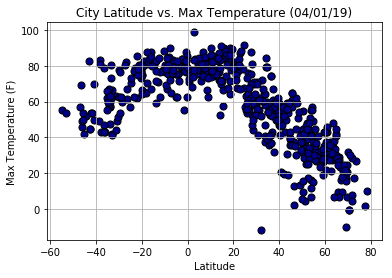

In [18]:
# Plot a scatter plot of latitude vs temperature with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Max Temp"], color="darkblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title(f"City Latitude vs. Max Temperature (04/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure to the output folder
plt.savefig("latVtemp.png")

#### Latitude vs. Humidity Plot

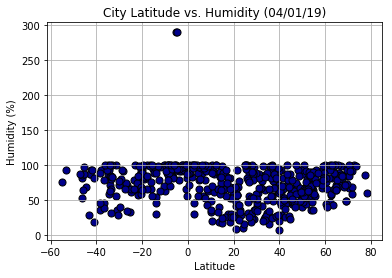

In [19]:
# Plot a scatter plot of latitude vs humidity with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Humidity"],color="darkblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Humidity (04/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("latVhum.png")

#### Latitude vs. Cloudiness Plot

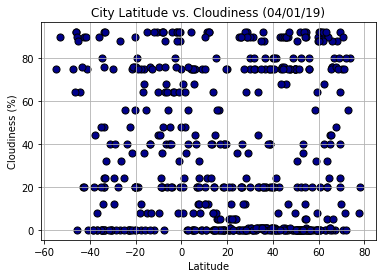

In [20]:
# Plot a scatter plot of latitude vs cloudiness with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Cloudiness"],color="darkblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Cloudiness (04/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("latVcloud.png")

#### Latitude vs. Wind Speed Plot

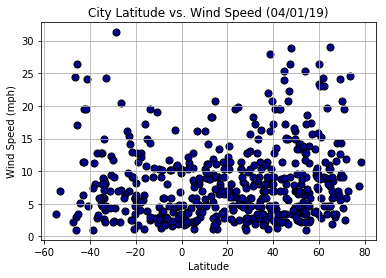

In [21]:
# Plot a scatter plot of latitude vs wind speed with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Wind Speed"],color="darkblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Wind Speed (04/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure to the output folder
plt.savefig("latVwindspeed.png")

In [11]:
#KEY OBSERVATIONS:
#1 #Humidity across the board barely exceeds 100 besides two cities in Peru that are close to 0 for latitude hover close to 300.
#2 Cities with a latitude between -40 and 40 do not have wind speed that exceeds 25 mph.
#3 As latitude increases positively, the max temperature decreases with one exception being Manali in India. It’s a resort town in the Himalayan mountain which is why its max temperature is only -11 despite its latitude is around 32. 
